Background:

Transjakarta serves as a crucial mode of public transportation in Jakarta, accommodating a diverse range of passengers daily. Understanding the nuances of rider demographics and revenue patterns is essential for optimizing service, enhancing passenger satisfaction, and maximizing financial efficiency.

Business Problem:
Transjakarta, a pivotal component of Jakarta's public transportation system, plays a critical role in the daily commute of millions. However, optimizing its operations and revenue generation is an ongoing challenge. This analysis focuses on two key areas:

Tap-In and Tap-Out Daily Revenue:
- Understanding the revenue patterns throughout the day by analyzing the tap-in and tap-out times.
- Identifying peak hours that generate the highest revenue.

Most Profitable Routes:
- Determining which routes are the most profitable.
- Analyzing revenue data to highlight the top-performing routes during peak hours.

By leveraging detailed data on tap-in and tap-out activities, we aim to uncover actionable insights that can enhance Transjakarta's service efficiency and financial performance. 

In [151]:
#import Necessary Libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [152]:
df = pd.read_csv('/Users/radhitaintan/Documents/modul 2/explore_it/Public Transportation Transaction - Transjakarta/Transjakarta.csv')
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


to get information from the dataset

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [154]:
#count missing value
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [155]:
pd.DataFrame(df.isna().sum()/df.shape[0]*100,columns=['null_percentage']).query('null_percentage>0')

,null_percentage
corridorID,3.316623
corridorName,5.092348
tapInStops,3.200528
tapOutStops,6.039578
tapOutStopsName,3.546174
tapOutStopsLat,3.546174
tapOutStopsLon,3.546174
stopEndSeq,3.546174
tapOutTime,3.546174
payAmount,2.656992


In [156]:
drop_column = ['corridorName', 'corridorID']
cleaned_df = df.drop(columns=drop_column)


In [157]:
# Calculate the mode for categorical data
mode_tap_out_stops_name = cleaned_df['tapOutStopsName'].mode()[0]
mode_tap_in_stops = cleaned_df['tapInStops'].mode()[0]
mode_tap_out_stops = cleaned_df['tapOutStops'].mode()[0]

# Calculate the median for numerical data
median_tap_out_stops_lat = cleaned_df['tapOutStopsLat'].median()
median_tap_out_stops_lon = cleaned_df['tapOutStopsLon'].median()
median_stop_end_seq = cleaned_df['stopEndSeq'].median()
mean_payamount = cleaned_df['payAmount'].mean()

# Fill missing values using the calculated mode and median
cleaned_df['tapOutStopsName'].fillna(mode_tap_out_stops_name, inplace=True)
cleaned_df['tapInStops'].fillna(mode_tap_in_stops, inplace=True)
cleaned_df['tapOutStops'].fillna(mode_tap_out_stops, inplace=True)
cleaned_df['tapOutStopsLat'].fillna(median_tap_out_stops_lat, inplace=True)
cleaned_df['tapOutStopsLon'].fillna(median_tap_out_stops_lon, inplace=True)
cleaned_df['stopEndSeq'].fillna(median_stop_end_seq, inplace=True)
cleaned_df['payAmount'].fillna(mean_payamount, inplace= True)

# For tapOutTime, consider using the mode if applicable
mode_tap_out_time = cleaned_df['tapOutTime'].mode()[0]
cleaned_df['tapOutTime'].fillna(mode_tap_out_time, inplace=True)


In [158]:
# Convert 'tapInTime' and 'tapOutTime' to datetime
cleaned_df['tapInTime'] = pd.to_datetime(cleaned_df['tapInTime'])
cleaned_df['tapOutTime'] = pd.to_datetime(cleaned_df['tapOutTime'])
print(cleaned_df.dtypes)

transID                     object
payCardID                    int64
payCardBank                 object
payCardName                 object
payCardSex                  object
payCardBirthDate             int64
direction                  float64
tapInStops                  object
tapInStopsName              object
tapInStopsLat              float64
tapInStopsLon              float64
stopStartSeq                 int64
tapInTime           datetime64[ns]
tapOutStops                 object
tapOutStopsName             object
tapOutStopsLat             float64
tapOutStopsLon             float64
stopEndSeq                 float64
tapOutTime          datetime64[ns]
payAmount                  float64
dtype: object


In [159]:
cleaned_df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [160]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  int64         
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  int64         
 6   direction         37900 non-null  float64       
 7   tapInStops        37900 non-null  object        
 8   tapInStopsName    37900 non-null  object        
 9   tapInStopsLat     37900 non-null  float64       
 10  tapInStopsLon     37900 non-null  float64       
 11  stopStartSeq      37900 non-null  int64         
 12  tapInTime         37900 non-null  datetime64[ns]
 13  tapOutStops       37900 non-null  object        
 14  tapOutStopsName   3790

In [161]:
cleaned_df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

In [162]:
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


In [163]:
#finding outliers
# Calculate Q1, Q3, and IQR
Q1 = df['payAmount'].quantile(0.25)
Q3 = df['payAmount'].quantile(0.75)
IQR = Q3 - Q1

# Determine the outlier cutoffs
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['payAmount'] < lower_bound) | (df['payAmount'] > upper_bound)]

# Print outliers
print(outliers)

              transID         payCardID payCardBank  \
5      DDES630K2F80KC  2251412124634980         dki   
8      OIHS248V7S72EB  6510013988638519         dki   
60     RHUT145C1U25ZY     4290559479079      online   
70     OTGH855B8A29BP  3549158005951908         dki   
117    YTOA058V9U73VN     4709994160903      online   
...               ...               ...         ...   
37854  AMQA420I2P82KP  3553882732550120         dki   
37878  FFUS474T7Q54QF    36067042340502         bni   
37879  LVSU593P5B50VF    30480183587078         bni   
37888  KWQA944F9O89IN  6585885975007109         dki   
37897  YXPP627N4G95HO   213159426675861      emoney   

                         payCardName payCardSex  payCardBirthDate corridorID  \
5                      Tirta Siregar          F              1993         1T   
8             Cagak Maheswara, S.Sos          F              1992        B14   
60                      Lutfan Hakim          M              2011        T21   
70         Mustofa 

 ## Demographic Analysis
 
with paycard as a dependent variable, we will use key Demographic Features:
Age: Derived from payCardBirthDate.
Gender: Provided by payCardSex.

In [164]:
# Convert birth year to age
from datetime import datetime 
current_yr = datetime.now().year
cleaned_df['Age'] = current_yr - df['payCardBirthDate']

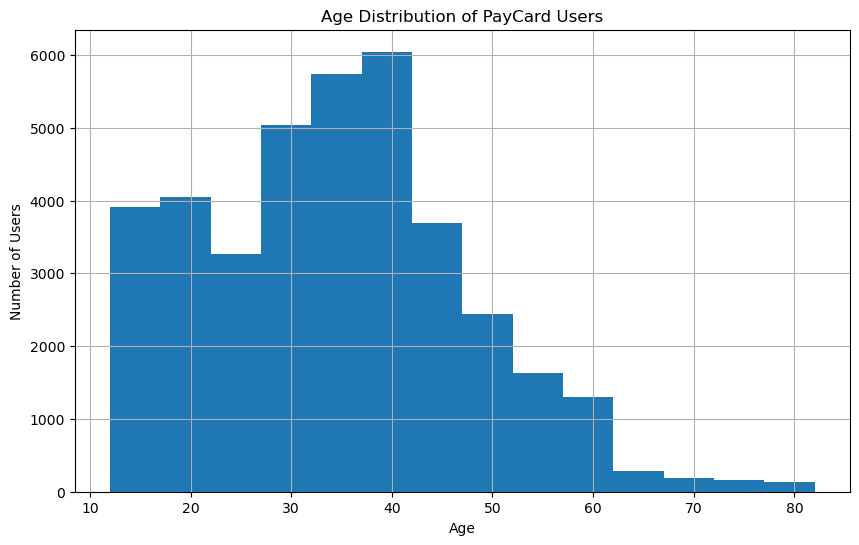

In [165]:
# Plotting age distribution
plt.figure(figsize=(10, 6))
cleaned_df['Age'].hist(bins=range(min(cleaned_df['Age']), max(cleaned_df['Age']) + 5, 5))
plt.title('Age Distribution of PayCard Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

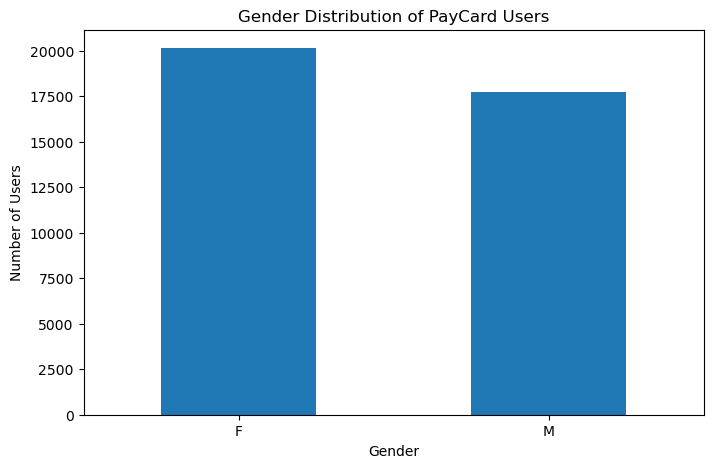

In [166]:
# Plotting gender distribution with barplot
gender_counts = cleaned_df['payCardSex'].value_counts()
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar')
plt.title('Gender Distribution of PayCard Users')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()


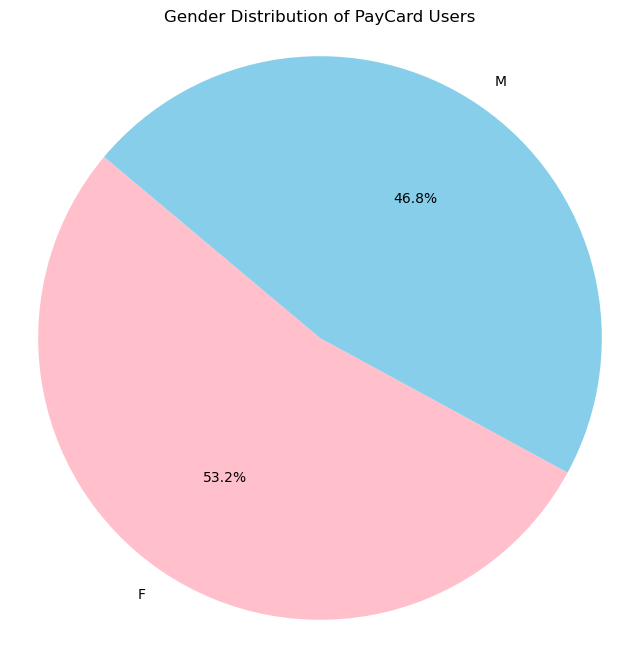

In [167]:
# Plotting gender distribution with piechart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'skyblue'])
plt.title('Gender Distribution of PayCard Users')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

/var/folders/yn/0hnvccxd6k514m0jc5jgs2yc0000gn/T/ipykernel_31832/4058182148.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_spend_by_age = cleaned_df.groupby('Age Group')['payAmount'].mean()


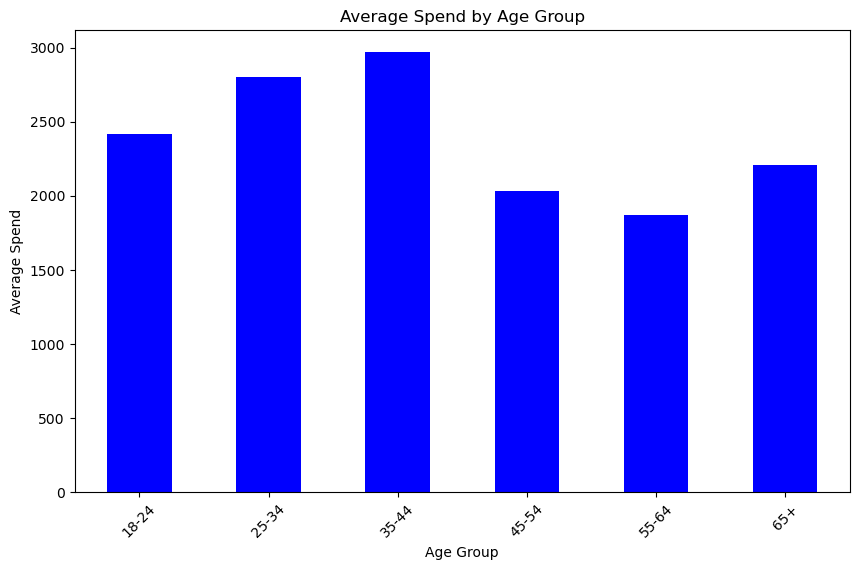

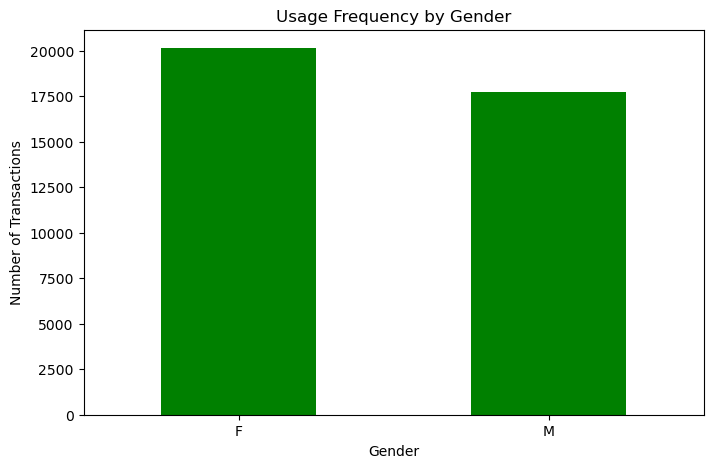

In [168]:
# Average amount spent by age group
cleaned_df['Age Group'] = pd.cut(cleaned_df['Age'], bins=[18, 25, 35, 45, 55, 65, 100], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
average_spend_by_age = cleaned_df.groupby('Age Group')['payAmount'].mean()

plt.figure(figsize=(10, 6))
average_spend_by_age.plot(kind='bar', color='blue')
plt.title('Average Spend by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spend')
plt.xticks(rotation=45)
plt.show()

# Card usage frequency by gender
usage_frequency_by_gender = cleaned_df.groupby('payCardSex')['transID'].count()

plt.figure(figsize=(8, 5))
usage_frequency_by_gender.plot(kind='bar', color='green')
plt.title('Usage Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()


bank usage customer analysis with payCardBank

In [169]:
# Count the occurrences of each bank
bank_counts = cleaned_df['payCardBank'].value_counts()

# Convert to percentage
bank_percentages = bank_counts / bank_counts.sum() * 100


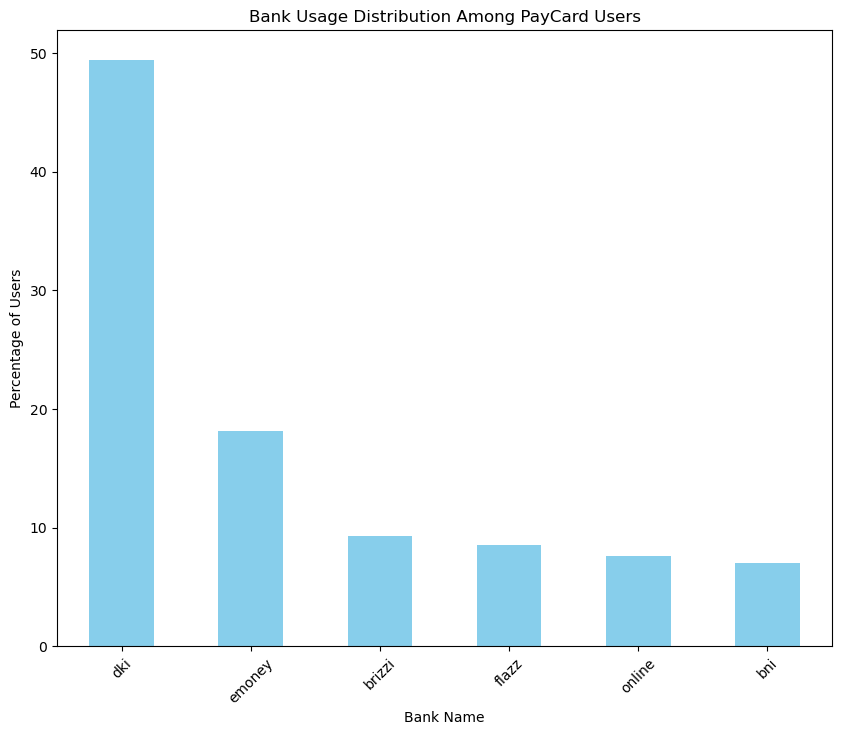

In [170]:
# Plotting bank usage
plt.figure(figsize=(10, 8))
bank_percentages.plot(kind='bar', color='skyblue')
plt.title('Bank Usage Distribution Among PayCard Users')
plt.xlabel('Bank Name')
plt.ylabel('Percentage of Users')
plt.xticks(rotation=45)
plt.show()

## Revenue Analysis

In [171]:
cleaned_df['tapInHour'] = cleaned_df['tapInTime'].dt.hour
cleaned_df['tapOutHour'] = cleaned_df['tapOutTime'].dt.hour

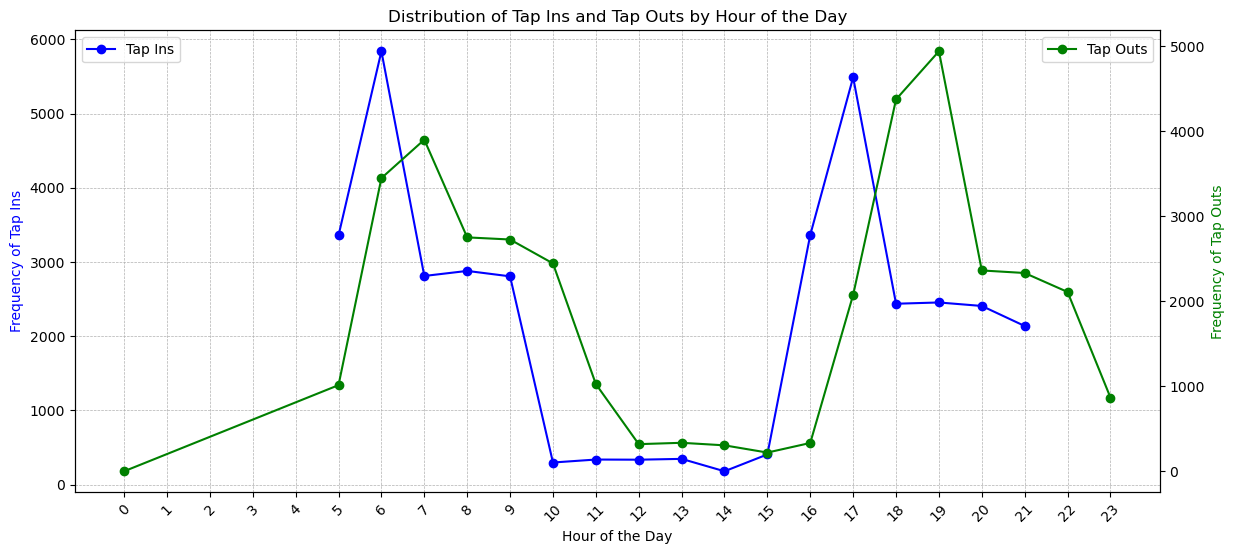

In [172]:
# Calculate frequency for each hour for tap ins and tap outs
tap_in_frequency = cleaned_df['tapInHour'].value_counts().sort_index()
tap_out_frequency = cleaned_df['tapOutHour'].value_counts().sort_index()

plt.figure(figsize=(14, 6))

# Create the first subplot for tap ins
ax1 = plt.subplot(1, 1, 1)  # Single subplot
ax1.plot(tap_in_frequency.index, tap_in_frequency, color='blue', marker='o', linestyle='-', label='Tap Ins')
ax1.set_ylabel('Frequency of Tap Ins', color='blue')
ax1.set_title('Distribution of Tap Ins and Tap Outs by Hour of the Day')
ax1.set_xlabel('Hour of the Day')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='upper left')

# Create a twin of the first subplot for tap outs
ax2 = ax1.twinx()
ax2.plot(tap_out_frequency.index, tap_out_frequency, color='green', marker='o', linestyle='-', label='Tap Outs')
ax2.set_ylabel('Frequency of Tap Outs', color='green')
ax2.legend(loc='upper right')

# Setting specific ticks on the x-axis
ax1.set_xticks(range(0, 24))  # Set ticks from 0 to 23 hours
ax1.set_xticklabels([f"{hour}" for hour in range(0, 24)], rotation=45)  # Label each tick

# Show the plot
plt.show()

In [173]:
tap_in_frequency = cleaned_df['tapInHour'].value_counts().sort_index()
tap_in_frequency

tapInHour
5     3358
6     5839
7     2812
8     2880
9     2807
10     299
11     339
12     337
13     348
14     181
15     408
16    3365
17    5488
18    2438
19    2455
20    2408
21    2138
Name: count, dtype: int64

In [174]:
tap_out_frequency = cleaned_df['tapOutHour'].value_counts().sort_index()
tap_out_frequency

tapOutHour
0        1
5     1014
6     3449
7     3901
8     2752
9     2727
10    2446
11    1027
12     320
13     336
14     306
15     221
16     334
17    2076
18    4375
19    4941
20    2363
21    2333
22    2110
23     868
Name: count, dtype: int64

Revenue by Time of Day

To understand how revenue varies throughout the day, we can group the data by the hour of tapInTime and calculate the total and average revenue per time period

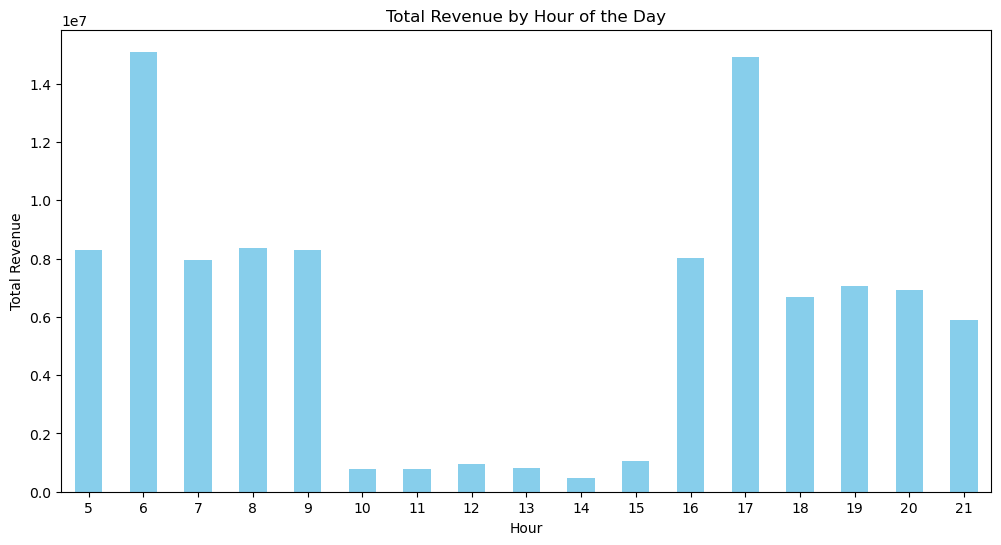

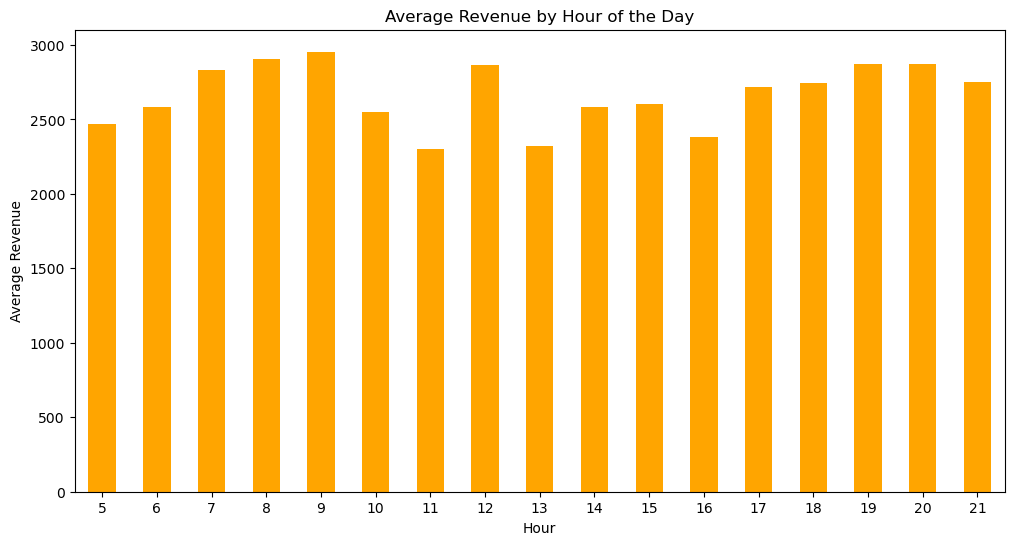

In [175]:
cleaned_df['Hour'] = cleaned_df['tapInTime'].dt.hour
revenue_by_hour = cleaned_df.groupby('Hour')['payAmount'].agg(['sum', 'mean'])

plt.figure(figsize=(12, 6))
revenue_by_hour['sum'].plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(12, 6))
revenue_by_hour['mean'].plot(kind='bar', color='orange')
plt.title('Average Revenue by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Revenue')
plt.xticks(rotation=0)
plt.show()

Revenue by Route

Aggregate revenue data by the route which can be derived from tapInStops and tapOutStops to see which routes are most and least profitable.

In [176]:
cleaned_df['Route'] = cleaned_df['tapInStopsName'] + " to " + cleaned_df['tapOutStopsName']
revenue_by_route = cleaned_df.groupby('Route')['payAmount'].agg(['sum', 'mean'])

# Display top 10 profitable routes
top_routes = revenue_by_route.sort_values(by='sum', ascending=False).head(10)
print(top_routes)


                                                sum          mean
Route                                                            
Bintaro Xchange to St. MRT Fatmawati       960000.0  20000.000000
SPBU Limo Cinere 1 to South City Cinere    900000.0  20000.000000
Gelora Bung Karno 1 to Bundaran Senayan 1  866500.0  14686.440678
Kuningan Madya 2 to Menara Duta            820000.0  20000.000000
Bundaran Senayan 1 to Bundaran Senayan 2   780000.0  20000.000000
Cibubur Junction to MH Thamrin 2           760000.0  20000.000000
Kejaksaan Agung to Blok M Jalur 4          760000.0  20000.000000
Versailles to St. MRT Fatmawati            740000.0  20000.000000
Carrefour Lebak Bulus to Bintaro Xchange   580000.0  20000.000000
Menara Mandiri to Gelora Bung Karno 1      540000.0  20000.000000


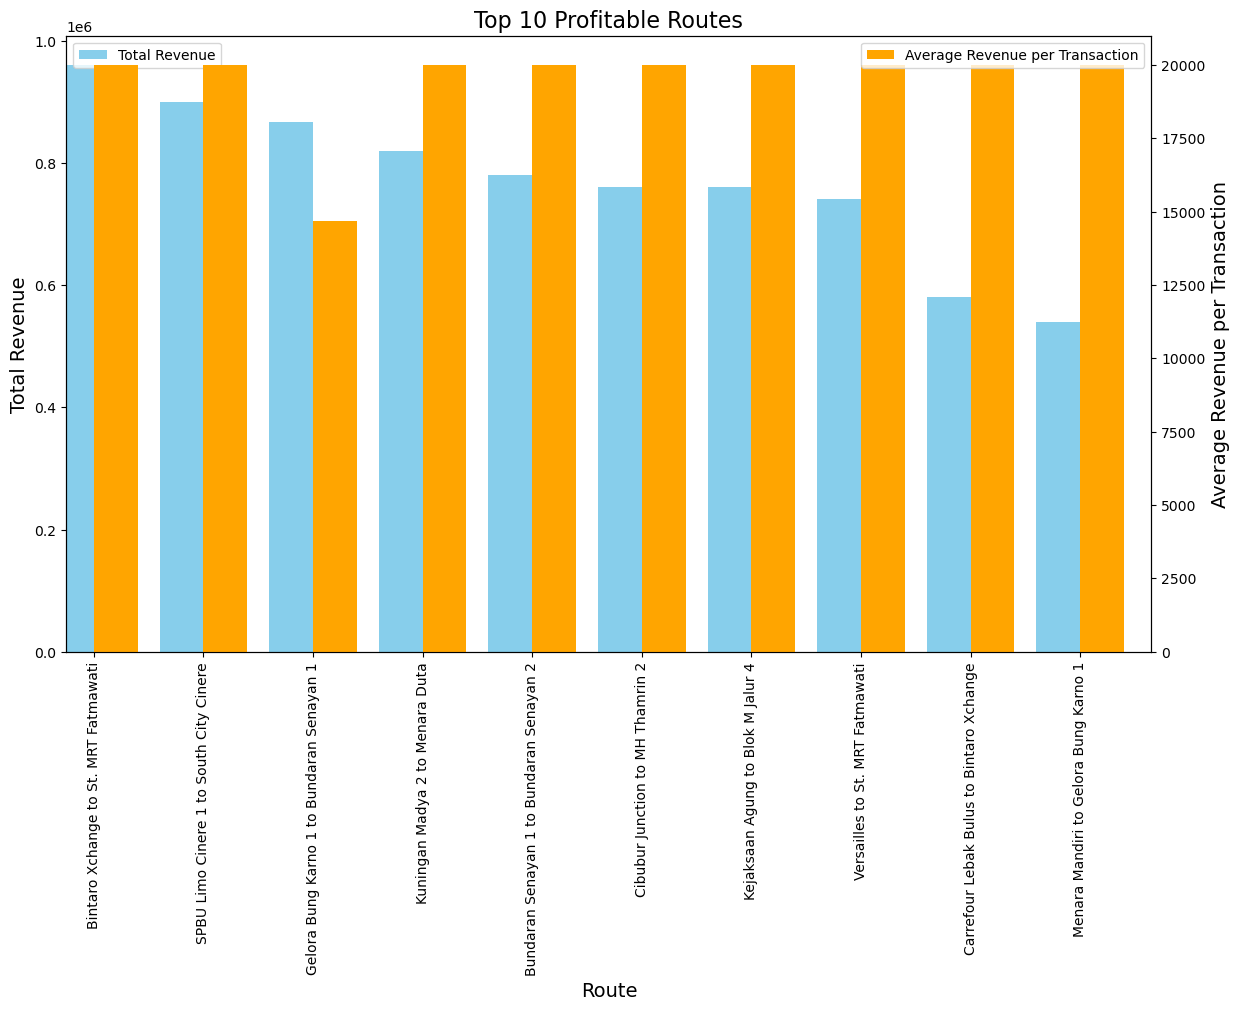

In [177]:
# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Create bars for total revenue
top_routes['sum'].plot(kind='bar', color='skyblue', ax=ax1, width=0.4, position=1, label='Total Revenue')

# Create a second y-axis for the average revenue
ax2 = ax1.twinx()
top_routes['mean'].plot(kind='bar', color='orange', ax=ax2, width=0.4, position=0, label='Average Revenue per Transaction')

# Labels and titles
ax1.set_xlabel('Route', fontsize=14)
ax1.set_ylabel('Total Revenue', fontsize=14)
ax2.set_ylabel('Average Revenue per Transaction', fontsize=14)
ax1.set_title('Top 10 Profitable Routes', fontsize=16)

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

In [178]:
# cleaned_df.to_csv('cleaned_Transjakarta.csv')
tap_in_frequency.to_csv('tap_in_frequency.csv')
tap_out_frequency.to_csv('tap_out_frequency.csv')

In [179]:
# Drop rows with null values in relevant columns
cleaned_df = cleaned_df.dropna(subset=['tapInStopsName', 'tapOutStopsName', 'payAmount', 'tapInTime', 'tapOutTime'])

# Create Route column
cleaned_df['Route'] = cleaned_df['tapInStopsName'] + " to " + cleaned_df['tapOutStopsName']

# Extract hour from tapInTime and tapOutTime
cleaned_df['tapInHour'] = pd.to_datetime(cleaned_df['tapInTime']).dt.hour
cleaned_df['tapOutHour'] = pd.to_datetime(cleaned_df['tapOutTime']).dt.hour

# Group by tapInHour and calculate total revenue
tapin_revenue_by_hour = cleaned_df.groupby('tapInHour')['payAmount'].sum().reset_index(name='TapInRevenue')

# Group by tapOutHour and calculate total revenue
tapout_revenue_by_hour = cleaned_df.groupby('tapOutHour')['payAmount'].sum().reset_index(name='TapOutRevenue')

# Group by Route and calculate total and average revenue
revenue_by_route = cleaned_df.groupby('Route')['payAmount'].agg(['sum', 'mean']).reset_index()
# Filter out routes with zero total revenue
revenue_by_route = revenue_by_route[revenue_by_route['sum'] > 0]

# Sort by total revenue and select top 10 most profitable routes
top_routes = revenue_by_route.sort_values(by='sum', ascending=False).head(10)

# Combine tap-in and tap-out revenue data
combined_revenue_by_hour = pd.merge(tapin_revenue_by_hour, tapout_revenue_by_hour, left_on='tapInHour', right_on='tapOutHour', how='outer', suffixes=('_TapIn', '_TapOut'))

In [180]:
# Save combined peak hour revenue and top 10 routes to CSV
combined_revenue_by_hour.to_csv('combined_revenue_by_hour.csv', index=False)
top_routes.to_csv('top_routes.csv', index=False)